# Linear Models

by Yesman Choque Mamani (<a href="https://github.com/yesmanic/Machine_Learning_Models">view on GitHub</a>)

This notebook demonstrates the application of Linear Models for data prediction, utilizing the scikit-learn library. It provides a step-by-step guide on how to train a Linar Model, make predictions, and evaluate the model's performance.

## Initial Setup

Let's import the necessary libraries and load the dataset.

In [174]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.datasets import load_diabetes

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

## Linear Models for Regression

### Linear Regression

Linear regression is a ordinary least squares (OLS) method for estimating the unknown parameters in a linear function that relates the independent variable to the dependent variable. The method minimizes the following cost function:
$$ RSS(\textbf w, b) = \sum^N_{i = 0} (y_i - (\textbf w \cdot \textbf x_i + b))^2 $$

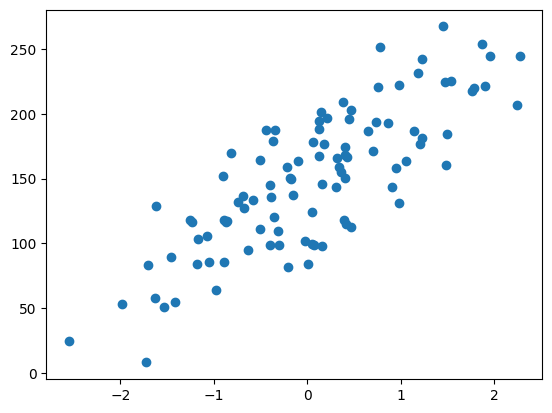

In [139]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1,
                       bias=150, noise=30, random_state=0)

plt.plot(X, y, 'o');

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
        .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
        .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
        .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
        .format(linreg.score(X_test, y_test)))

linear model coeff (w): [45.70870465]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


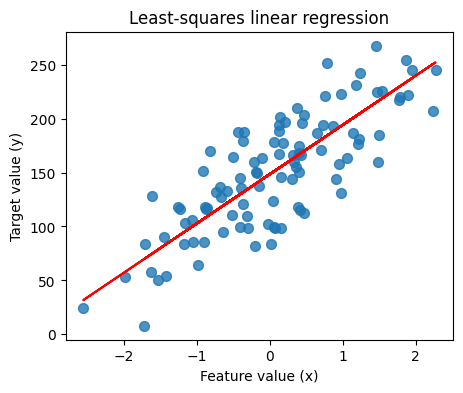

In [141]:
plt.figure(figsize=(5,4))
plt.scatter(X, y, marker= 'o', s=50, alpha=0.8)
plt.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

### Ridge Regression

Ridge regression is a linear regression model that uses L2 regularization to prevent overfitting. It adds a penalty term to the loss function, which is the sum of the squared weights multiplied by the regularization parameter alpha.

$$ RSS_{L2}(\textbf w, b) = \sum^N_{i = 0} (\textbf y_i - (\textbf w \cdot \textbf x_i + b))^2 + \alpha \sum^p_{i = 0} w_j^2$$

In [142]:
ridge_reg =  Ridge(alpha=10).fit(X_train, y_train)

print('ridge regression linear model coeff (w): {}'
        .format(ridge_reg.coef_))
print('ridge regression linear model intercept (b): {:.3f}'
        .format(ridge_reg.intercept_))
print('R-squared score (training): {:.3f}'
        .format(ridge_reg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
        .format(ridge_reg.score(X_test, y_test)))

ridge regression linear model coeff (w): [40.44291442]
ridge regression linear model intercept (b): 148.468
R-squared score (training): 0.670
R-squared score (test): 0.532


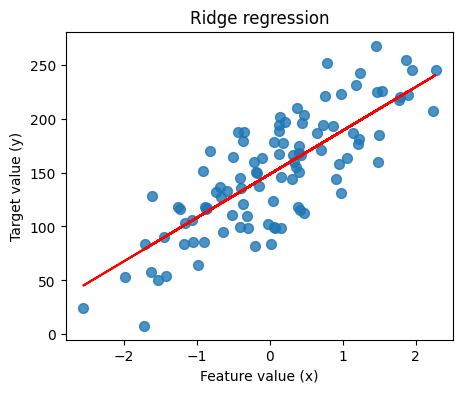

In [143]:
plt.figure(figsize=(5,4))
plt.scatter(X, y, marker= 'o', s=50, alpha=0.8)
plt.plot(X, ridge_reg.coef_ * X + ridge_reg.intercept_, 'r-')
plt.title('Ridge regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

### Lasso Regression

Lasso regression is a linear regression model that uses L1 regularization to prevent overfitting. It adds a penalty term to the loss function, which is the sum of the absolute weights multiplied by the regularization parameter alpha.

$$ RSS_{L1}(\textbf w, b) = \sum^N_{i = 0} (\textbf y_i - (\textbf w \cdot \textbf x_i + b))^2 + \alpha \sum^p_{i = 0} |w_j|$$

In [144]:
lasso_reg = Lasso(alpha=10).fit(X_train, y_train)

print('lasso regression linear model coeff (w): {}'
        .format(lasso_reg.coef_))
print('lasso regression linear model intercept (b): {:.3f}'
        .format(lasso_reg.intercept_))
print('R-squared score (training): {:.3f}'
        .format(lasso_reg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
        .format(lasso_reg.score(X_test, y_test)))

lasso regression linear model coeff (w): [35.94347697]
lasso regression linear model intercept (b): 148.487
R-squared score (training): 0.648
R-squared score (test): 0.545


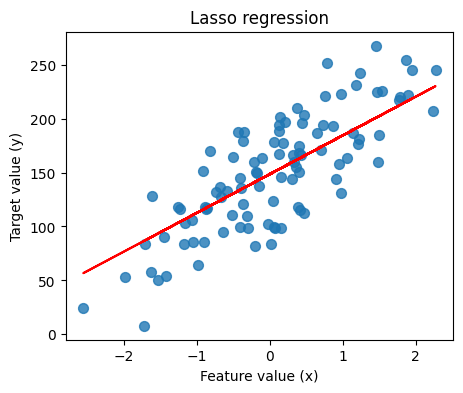

In [145]:
plt.figure(figsize=(5,4))
plt.scatter(X, y, marker= 'o', s=50, alpha=0.8)
plt.plot(X, lasso_reg.coef_ * X + lasso_reg.intercept_, 'r-')
plt.title('Lasso regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

### Normalization

Normalization can contribute to a faster convergence of the optimization algorithm. It is recommended to normalize the input features before training the model.

In [146]:
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_reg_with_scaling = Ridge(alpha=10).fit(X_train_scaled, y_train)
ridge_reg = Ridge(alpha=10).fit(X_train, y_train)

In [147]:
print('Ridge regression with feature scaling')
print('R-squared score (training): {:.3f}'
        .format(ridge_reg_with_scaling.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
        .format(ridge_reg_with_scaling.score(X_test_scaled, y_test)))

print('\nRidge regression without feature scaling')
print('R-squared score (training): {:.3f}'
        .format(ridge_reg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
        .format(ridge_reg.score(X_test, y_test)))

Ridge regression with feature scaling
R-squared score (training): 0.484
R-squared score (test): 0.412

Ridge regression without feature scaling
R-squared score (training): 0.165
R-squared score (test): 0.145


### Polynomial Regression

Polynomial regression is a linear regression model that uses polynomial features to fit a non-linear function. It adds polynomial features to the input data and then applies linear regression to the transformed data.


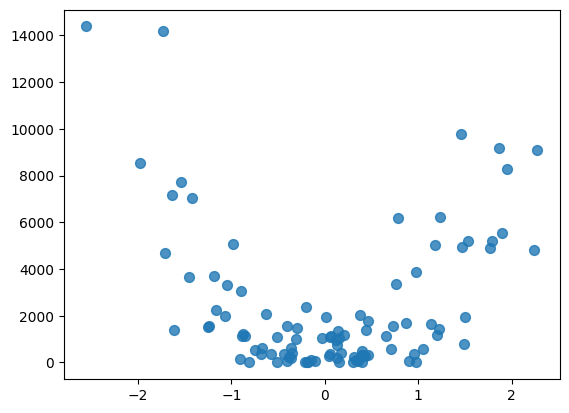

In [267]:
# make regression with a quadratic tendency
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, noise=20, random_state=0)
y = y ** 2
plt.scatter(X, y, marker= 'o', s=50, alpha=0.8);

In [268]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)

linreg = LinearRegression().fit(X_train, y_train)

In [269]:
score = linreg.score(X_test, y_test)
print('(poly deg 2) linear model coeff (w):\n{}'
        .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
        .format(linreg.intercept_))

print('R-squared score (test): {:.3f}'
        .format(score))

score = linreg.score(X_train, y_train)
print('R-squared score (training): {:.3f}'
        .format(score))

(poly deg 2) linear model coeff (w):
[ -84.04661046 2053.6247847 ]
(poly deg 2) linear model intercept (b): 385.486
R-squared score (test): 0.230
R-squared score (training): 0.708


In [270]:
X_train.shape

(75, 2)

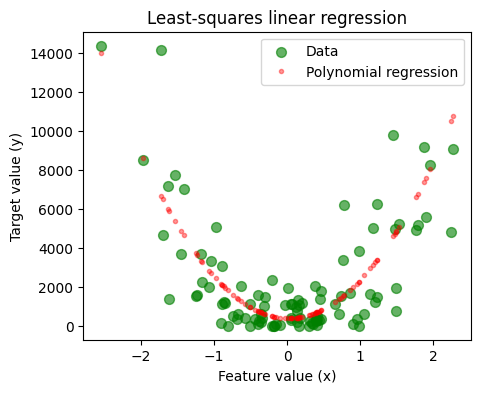

In [273]:
plt.figure(figsize=(5,4))
plt.scatter(X, y, color='green', marker= 'o', s=50, alpha=0.6, label='Data')
plt.plot(X, linreg.predict(X_poly), 'r.', alpha=0.4, label='Polynomial regression')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.legend()
plt.show()